In [2]:
import cv2 as cv
import os
import numpy as np
 
 
# 遍历文件夹函数
def getFileList(dir, Filelist, ext=None):
    """
    获取文件夹及其子文件夹中文件列表
    输入 dir：文件夹根目录
    输入 ext: 扩展名
    返回： 文件路径列表
    """
    newDir = dir
    if os.path.isfile(dir):
        if ext is None:
            Filelist.append(dir)
        else:
            if ext in dir[-3:]:
                Filelist.append(dir)
 
    elif os.path.isdir(dir):
        for s in os.listdir(dir):
            newDir = os.path.join(dir, s)
            getFileList(newDir, Filelist, ext)
 
    return Filelist
 
 
def mid(follow, mask):
    half = follow.shape[1] // 2  # 从下往上扫描赛道,最下端取图片中线为分割线
    for y in range(follow.shape[0] - 1, -1, -1):
 
        if (mask[y][0:half] == np.zeros_like(mask[y][0:half])).all():  # 分割线左端无赛道
            left = 0  # 取图片左边界为赛道左边界
        else:
            left = np.average(np.where(mask[y][0:half] == 255))  # 计算分割线左端平均位置
        if (mask[y][half:follow.shape[1]] == np.zeros_like(mask[y][half:follow.shape[1]])).all():  # 分割线右端无赛道
            right = follow.shape[1]  # 取图片右边界为赛道右边界
        else:
            right = np.average(np.where(mask[y][half:follow.shape[1]] == 255)) + half  # 计算分割线右端平均位置
 
        mid = (left + right) // 2  # 计算拟合中点
        half = int(mid)  # 递归,从下往上确定分割线
        follow[y, int(mid)] = 255  # 画出拟合中线
 
        if y == 360:  # 设置指定提取中点的纵轴位置
            mid_output = int(mid)
 
    cv.circle(follow, (mid_output, 360), 5, 255, -1)  # opencv为(x,y),画出指定提取中点
 
    error = follow.shape[1] // 2 - mid_output  # 计算图片中点与指定提取中点的误差
 
    return follow, error  # error为正数右转,为负数左转
 
cap=cv.VideoCapture(0)
img = cap.read()[1]
cap.release()

# HSV阈值分割
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
mask = cv.inRange(img_hsv, np.array([43, 60, 90]), np.array([62, 255, 255]))

follow = mask.copy()
follow, error = mid(follow, mask)
print( f"error:{error}")

cv.imshow("img", img)
cv.imshow("mask", mask)
cv.imshow("follow", follow)
cv.waitKey(0)

cv.destroyAllWindows()

error:0


In [4]:
list(map(lambda x:2*x,[1,2,3]))

[2, 4, 6]

[96 89 57 38 88 56 85 27 83 34 61 78 66  9 96  4 83 80 94  6 86 42  8 19
 80 44 87 87 87  8 50  9 73 54 95 99 93 50 67 22 12 10 41 41 44 41 79 57
 46 79 23 43 45 36 29 27 74 77 46 89 39  3 46 50 34 89 83 87 67 86 87 34
 87  9 45 78 57 39 35 42 37 44 51 61 91 96 16 57 66 26 37 46 68 45 72 57
 33 10 41 10]


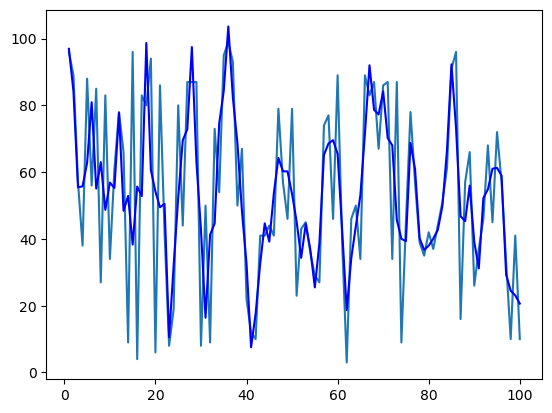

In [3]:
# 用于生成问题描述中示例曲线的代码如下：
import numpy as np
import matplotlib.pyplot as plt
Size = 100
x = np.linspace(1, Size,Size)

data = np.random.randint(1, Size, Size)
print(data)
      
# 可视化图线
plt.plot(x, data)

# 使用Savitzky-Golay 滤波器后得到平滑图线
from scipy.signal import savgol_filter

y = savgol_filter(data, 5, 3, mode= 'nearest')
# 可视化图线
plt.plot(x, y, 'b', label = 'savgol')
